In [45]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
import os
import glob
import SimpleITK as sitk
import numpy as np
import logging
from ipywidgets import interact
import ipywidgets as widgets
from src.data.datasets import UKBioPatient
from src.utils.Utils_io import Console_and_file_logger
%reload_ext autoreload
%autoreload 2
Console_and_file_logger(log_lvl=logging.INFO)

2022-06-02 12:01:03,099 INFO -------------------- Start --------------------
2022-06-02 12:01:03,100 INFO Working directory: /mnt/ssd/git/cmr-phase-detection.
2022-06-02 12:01:03,100 INFO Log file: ./logs/Log.log
2022-06-02 12:01:03,100 INFO Log level for console: INFO


search for root_dir and set working directory
Working directory set to: /mnt/ssd/git/cmr-phase-detection


In [46]:
# create one UKBioPatient per patient, this will extract the SAX CMR volume as 4D nrrd
# initialise all files
pat = UKBioPatient('/mnt/ssd/data/ukbio/patient_test/1001829_20209_2_0/',export_root='/mnt/ssd/data/ukbio/import/')
# load dicom files and process
pat()

2022-06-02 12:01:13,160 INFO processing patient: PN7MKF9C
2022-06-02 12:01:13,631 INFO Image size: (192, 208, 8, 50)
2022-06-02 12:01:13,631 INFO Image Spacing: (1.8269230127335, 1.8269230127335, 10.0, 17.0)
2022-06-02 12:01:13,698 INFO patient PN7MKF9C done.


In [47]:
import_path = '/mnt/ssd/data/ukbio/raw/'
export_root = '/mnt/ssd/data/ukbio/import/'
patients = sorted(glob.glob(os.path.join(import_path,'*/')))
print(len(patients))
for p in patients:
    UKBioPatient(p,export_root=export_root)()

2022-06-02 12:01:16,179 INFO processing patient: J67B4XM8


14


2022-06-02 12:01:16,856 INFO Image size: (174, 208, 11, 50)
2022-06-02 12:01:16,856 INFO Image Spacing: (1.8269230127335, 1.8269230127335, 10.0, 22.0)
2022-06-02 12:01:16,904 INFO patient J67B4XM8 done.
2022-06-02 12:01:16,925 INFO processing patient: BPAU9F4K
2022-06-02 12:01:17,528 INFO Image size: (186, 208, 11, 50)
2022-06-02 12:01:17,529 INFO Image Spacing: (1.8269230127335, 1.8269230127335, 10.0, 16.0)
2022-06-02 12:01:17,580 INFO patient BPAU9F4K done.
2022-06-02 12:01:17,607 INFO processing patient: B4ACBHZX
2022-06-02 12:01:18,258 INFO Image size: (180, 208, 11, 50)
2022-06-02 12:01:18,258 INFO Image Spacing: (1.8269231319427, 1.8269231319427, 10.0, 17.0)
2022-06-02 12:01:18,307 INFO patient B4ACBHZX done.
2022-06-02 12:01:18,328 INFO processing patient: 7T4446E8
2022-06-02 12:01:18,909 INFO Image size: (156, 208, 11, 50)
2022-06-02 12:01:18,910 INFO Image Spacing: (1.8269231319427, 1.8269231319427, 10.0, 24.0)
2022-06-02 12:01:18,953 INFO patient 7T4446E8 done.
2022-06-02 12:

In [145]:
files_ = sorted(glob.glob('/mnt/ssd/data/ukbio/patient_test/*.dcm'))
manifest_f = glob.glob('/mnt/ssd/data/ukbio/patient_test/manifest.cvs')[0]
print(len(files_))
print(manifest_f)

1053
/mnt/ssd/data/ukbio/patient_test/manifest.cvs


In [162]:
pat = UKBioPatient('/mnt/ssd/data/ukbio/patient_test/',export_root='/mnt/ssd/data/ukbio/import/')()

2022-06-01 15:51:40,174 DEBUG 32NXXT4Z
2022-06-01 15:51:40,583 DEBUG images to sort: 450 , sortbytime: False
2022-06-01 15:51:40,584 DEBUG size: (156, 208, 1)
2022-06-01 15:51:40,584 DEBUG spacing: (1.8269231319427, 1.8269231319427, 10.0)
2022-06-01 15:51:40,585 DEBUG origin: (161.10707934196, -114.95163237563, 167.20877373984)
2022-06-01 15:51:40,585 DEBUG direction: (0.2934131097787892, -0.7983333513402902, -0.5259017086373854, 0.8631374839303209, -0.015265339788399862, 0.5047382026710282, -0.41097740916548625, -0.6020222832577926, 0.6845923893943745)
2022-06-01 15:51:40,585 DEBUG pixel type: 16-bit unsigned integer
2022-06-01 15:51:40,586 DEBUG number of pixel components: 1
2022-06-01 15:51:40,587 DEBUG images: 450
2022-06-01 15:51:40,587 DEBUG timesteps: 50
2022-06-01 15:51:40,588 DEBUG slices: 9
2022-06-01 15:51:40,588 DEBUG Temporal resolution: 18.0
2022-06-01 15:51:40,588 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 15:51:40,590 DEBUG images to sort: 50 , sortbytime: T

In [129]:
import pandas as pd
df = pd.read_csv(manifest_f)
df.head()

,filename,patientid,studyid,study discription,date,seriesid,series discription,aet,host
0,1.3.12.2.1107.5.2.18.141631.201911091130553325...,32NXXT4Z,1.2.826.0.1.4978912.2202.20191109110547,UK_Biobank^heart,2019-11-09,1.3.12.2.1107.5.2.18.141631.201911091129197654...,CINE_segmented_SAX_b7,Aera,AWP141631
1,1.3.12.2.1107.5.2.18.141631.201911091130552702...,32NXXT4Z,1.2.826.0.1.4978912.2202.20191109110547,UK_Biobank^heart,2019-11-09,1.3.12.2.1107.5.2.18.141631.201911091129197654...,CINE_segmented_SAX_b7,Aera,AWP141631
2,1.3.12.2.1107.5.2.18.141631.201911091130546533...,32NXXT4Z,1.2.826.0.1.4978912.2202.20191109110547,UK_Biobank^heart,2019-11-09,1.3.12.2.1107.5.2.18.141631.201911091129197654...,CINE_segmented_SAX_b7,Aera,AWP141631
3,1.3.12.2.1107.5.2.18.141631.201911091130549945...,32NXXT4Z,1.2.826.0.1.4978912.2202.20191109110547,UK_Biobank^heart,2019-11-09,1.3.12.2.1107.5.2.18.141631.201911091129197654...,CINE_segmented_SAX_b7,Aera,AWP141631
4,1.3.12.2.1107.5.2.18.141631.201911091130552804...,32NXXT4Z,1.2.826.0.1.4978912.2202.20191109110547,UK_Biobank^heart,2019-11-09,1.3.12.2.1107.5.2.18.141631.201911091129197654...,CINE_segmented_SAX_b7,Aera,AWP141631


In [130]:
df['series discription'].unique()

array(['CINE_segmented_SAX_b7', 'CINE_segmented_SAX_b8',
       'CINE_segmented_SAX_InlineVF', 'CINE_segmented_SAX_b1',
       'CINE_segmented_SAX_b9', 'Inline_VF_Results',
       'CINE_segmented_SAX_b2', 'CINE_segmented_SAX_b3',
       'CINE_segmented_SAX_b4', 'CINE_segmented_SAX_b5',
       'CINE_segmented_SAX_b6'], dtype=object)

In [144]:
df['studyid'].unique()

array(['1.2.826.0.1.4978912.2202.20191109110547'], dtype=object)

In [131]:
filenames = [os.path.basename(f) for f in files_]
filenames[0]

'1.3.12.2.1107.5.2.18.141631.2019110911291992327777274.dcm'

In [132]:
temp = df[df['series discription'].str.lower().str.contains('results')]['filename']
temp = [os.path.join(patient_folder,f) for f in temp]

2022-06-01 14:20:18,889 DEBUG size: (1024, 1024, 1)
2022-06-01 14:20:18,890 DEBUG spacing: (1.0, 1.0, 1.0)
2022-06-01 14:20:18,890 DEBUG origin: (0.0, 0.0, 0.0)
2022-06-01 14:20:18,891 DEBUG direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
2022-06-01 14:20:18,891 DEBUG pixel type: 16-bit unsigned integer
2022-06-01 14:20:18,891 DEBUG number of pixel components: 1


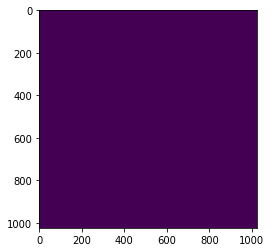

In [141]:
import matplotlib.pyplot as plt
t = sitk.ReadImage(temp[2])
describe_sitk(t)
nda = sitk.GetArrayFromImage(t)
plt.imshow(nda[0])

In [104]:
sax_files_inline = df[df['series discription'].str.upper().str.contains('INLINEVF')]['filename']
sax_files_inline = [os.path.join(patient_folder,f) for f in sax_files_inline]

In [73]:
sax_files_short = df[df['series discription'].str.upper().str.contains('SAX_B')]['filename']

In [97]:
patient_folder = '/mnt/ssd/data/ukbio/patient_test/'
sax_files = [os.path.join(patient_folder,f) for f in sax_files_inline]
print(len(sax_files))


600


In [98]:
dicom_images = [sitk.ReadImage(f) for f in sax_files]

# sort masks by shape of image
img_shape = (156,208,1)
print('before filter: {}'.format(len(dicom_images)))
dicom_images = [img for img in dicom_images if img.GetSize()==img_shape]
print('after filter: {}'.format(len(dicom_images)))

dicoms_sorted = sort_dicoms(dicom_images, sort_for_time=False)

2022-06-01 12:24:49,661 DEBUG images to sort: 450 , sortbytime: False


before filter: 600
after filter: 450


In [99]:
timesteps = int(get_timesteps(dicoms_sorted))
# check if we might miss some dicom images
if not (len(dicoms_sorted) / timesteps).is_integer():
    logging.error(
        'number of dicom slices {}/ timesteps {} is not an integer, trying to round z but maybe there are wrong dicom files, check: \n'.format(len(dicoms_sorted), timesteps))
slices = int(len(dicoms_sorted) / timesteps)
describe_sitk(dicoms_sorted[0])
lower_boundary = 0
upper_boundary = timesteps

2022-06-01 12:24:51,340 DEBUG size: (156, 208, 1)
2022-06-01 12:24:51,341 DEBUG spacing: (1.8269231319427, 1.8269231319427, 10.0)
2022-06-01 12:24:51,341 DEBUG origin: (161.10707934196, -114.95163237563, 167.20877373984)
2022-06-01 12:24:51,341 DEBUG direction: (0.2934131097787892, -0.7983333513402902, -0.5259017086373854, 0.8631374839303209, -0.015265339788399862, 0.5047382026710282, -0.41097740916548625, -0.6020222832577926, 0.6845923893943745)
2022-06-01 12:24:51,342 DEBUG pixel type: 16-bit unsigned integer
2022-06-01 12:24:51,342 DEBUG number of pixel components: 1


In [100]:
image_nda = []
lower_boundary = 0
upper_boundary = timesteps

# build new spacing with z = slice thickness and t = 1
spacing_3d = dicoms_sorted[0].GetSpacing()
origin_3d = dicoms_sorted[0].GetOrigin()
direction = dicoms_sorted[0].GetDirection()
# dicoms_sorted[0] = lowest slice of first volume, use it as origin
origin = (origin_3d[0], origin_3d[1], origin_3d[2], 0)

z_spacing = spacing_3d[2]
if z_spacing == 1:  # some volumes dont have z spacing, they have one series per slice, use the slice thickness (0018,0050)
    z_spacing = int(get_metadata_maybe(dicoms_sorted[0], '0018|0050', 6))  # default is 6
    logging.debug('no spacing given, use slice thickness: {} as z-spacing '.format(z_spacing))

# get the temporal resolution of this volume
sequence_length = get_sequence_length(dicoms_sorted)
# divide the sequence length in ms by the number of images
temp_spacing = sequence_length//timesteps
spacing = (spacing_3d[0], spacing_3d[1], z_spacing, temp_spacing)
#logging.debug('Building volumes for patient: {}'.format(args['patient']))
logging.debug('images: {}'.format(len(dicoms_sorted)))
logging.debug('timesteps: {}'.format(timesteps))
logging.debug('slices: {}'.format(slices))
logging.debug('Temporal resolution: {}'.format(temp_spacing))

diffs = []
# The dicoms are sorted by origin
# By this we can slice one slice + t
for z in range(slices):
    # take all timesteps of one slice,
    # sort timesteps of this slice by Triggertime
    image_volume_aslist = dicoms_sorted[lower_boundary:upper_boundary].copy()
    image_volume_aslist = sort_dicoms(image_volume_aslist, sort_for_time=True)

    img_t = []
    # for each timesteps of this slice we check if we find a contour which is mapped by the image uid
    for sitk_img in image_volume_aslist:

        img_t.append(np.squeeze(sitk.GetArrayFromImage(sitk_img), axis=0))
        
    image_nda.append(np.stack(img_t, axis=0))

    lower_boundary = lower_boundary + timesteps
    upper_boundary = upper_boundary + timesteps


# currently its a list of 2D slices + t --> stack along the z axis (t,z,x,y)
# align with the image orientation of the ACDC dataset (basal to apical)
new_img_clean = np.stack(image_nda, axis=1).astype(np.float32)
new_img_clean = np.flip(new_img_clean, axis=1)

# sitk.GetImageFromArray cant handle 4d images, join series will help
sitk_images = [sitk.GetImageFromArray(vol) for vol in new_img_clean]
# copy rotation/direction
_ = [img.SetDirection(direction) for img in sitk_images]
new_img_clean = sitk.JoinSeries(sitk_images)

size = new_img_clean.GetSize()
dimension = new_img_clean.GetDimension()
logging.info("Image size: {}".format(size))
logging.debug("Image dimension: {}".format(dimension))
logging.info("Image Spacing: {}".format(spacing))
logging.debug('Writing images ...')

# Copy image tags to new volume
sitk_img = dicoms_sorted[0]
for tag in sitk_img.GetMetaDataKeys():
    value = get_metadata_maybe(sitk_img, tag)
    new_img_clean.SetMetaData(tag, value)

new_img_clean.SetSpacing(spacing)
new_img_clean.SetOrigin(origin)
# set the temporal resolution
new_img_clean.SetMetaData('0020|0110', str(temp_spacing))
sitk.WriteImage(new_img_clean, os.path.join(patient_folder,'cmr4d.nrrd'))

2022-06-01 12:24:55,892 DEBUG images: 450
2022-06-01 12:24:55,893 DEBUG timesteps: 50
2022-06-01 12:24:55,893 DEBUG slices: 9
2022-06-01 12:24:55,894 DEBUG Temporal resolution: 18.0
2022-06-01 12:24:55,896 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,898 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,900 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,902 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,903 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,905 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,906 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,907 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,908 DEBUG images to sort: 50 , sortbytime: True
2022-06-01 12:24:55,950 INFO Image size: (156, 208, 9, 50)
2022-06-01 12:24:55,951 DEBUG Image dimension: 4
2022-06-01 12:24:55,951 INFO Image Spacing: (1.8269231319427, 1.8269231319427, 10.0, 18.0)
2022-06

In [101]:
list(map(lambda x : print(x.shape), image_nda))

(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)
(50, 208, 156)


[None, None, None, None, None, None, None, None, None]

In [106]:
# describe the dicom tags
import subprocess
import time
from src.utils.Utils_io import ensure_dir
@interact
def describe_4D_nrrds_interactive(f_name = sax_files_inline, plot_histogram=False):
#def describe_4D_nrrds_interactive(f_name = sorted(glob.glob('/mnt/data/git/cardio/data/raw/gcn_05_2020_ax_sax_86/SAX_3D/*img.nrrd', recursive=True)), plot_histogram=False):
    
    logging.info(f_name)
    temp = 'data/temp'
    ensure_dir(temp)
    sitk_img = sitk.ReadImage(f_name)
    describe_sitk(sitk_img)
    f_temp = os.path.abspath(os.path.join(temp,'temp.dcm'))
    logging.info(f_temp)
    sitk.WriteImage(sitk_img, f_temp)
    #time.sleep(1)
    result = subprocess.run(['dcmdump', '{}'.format(f_temp)], stdout=subprocess.PIPE)
    res = result.stdout.decode('utf-8')
    
    return res.split('\n')


interactive(children=(Dropdown(description='f_name', options=('/mnt/ssd/data/ukbio/patient_test/1.3.12.2.1107.…

In [107]:
get_metadata_maybe(sitk.ReadImage(sax_files_inline[0]),'6000|3000')

'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [112]:
sitk.ReadImage(sax_files_inline[0]).GetMetaData('7fe0|0010')

RuntimeError: Exception thrown in SimpleITK Image_GetMetaData: /tmp/SimpleITK-build/ITK/Modules/Core/Common/src/itkMetaDataDictionary.cxx:77:
itk::ERROR: Key '7fe0|0010' does not exist 

In [109]:
get_metadata_maybe(sitk.ReadImage(sax_files_inline[0]),'7fe0|0010')

2022-06-01 12:37:46,262 DEBUG key not found: 7fe0|0010, Exception thrown in SimpleITK Image_GetMetaData: /tmp/SimpleITK-build/ITK/Modules/Core/Common/src/itkMetaDataDictionary.cxx:77:
itk::ERROR: Key '7fe0|0010' does not exist 


'not_found'

In [113]:
res = describe_4D_nrrds_interactive(sax_files_inline[0])

2022-06-01 12:48:57,995 INFO /mnt/ssd/data/ukbio/patient_test/1.3.12.2.1107.5.2.18.141631.2019110911321214171079161.dcm
2022-06-01 12:48:57,999 DEBUG size: (156, 208, 1)
2022-06-01 12:48:57,999 DEBUG spacing: (1.8269231319427, 1.8269231319427, 10.0)
2022-06-01 12:48:58,000 DEBUG origin: (119.03494341666, -74.572575445087, 221.97616589835)
2022-06-01 12:48:58,000 DEBUG direction: (0.2934131097787892, -0.7983333513402902, -0.5259017086373854, 0.8631374839303209, -0.015265339788399862, 0.5047382026710282, -0.41097740916548625, -0.6020222832577926, 0.6845923893943745)
2022-06-01 12:48:58,000 DEBUG pixel type: 16-bit unsigned integer
2022-06-01 12:48:58,000 DEBUG number of pixel components: 1
2022-06-01 12:48:58,001 INFO /mnt/ssd/git/cmr-phase-detection/data/temp/temp.dcm


In [114]:
res

['',
 '# Dicom-File-Format',
 '',
 '# Dicom-Meta-Information-Header',
 '# Used TransferSyntax: Little Endian Explicit',
 '(0002,0000) UL 244                                      #   4, 1 FileMetaInformationGroupLength',
 '(0002,0001) OB 00\\01                                    #   2, 1 FileMetaInformationVersion',
 '(0002,0002) UI =MRImageStorage                          #  26, 1 MediaStorageSOPClassUID',
 '(0002,0003) UI [1.3.12.2.1107.5.2.18.141631.2019110911321214171079161] #  54, 1 MediaStorageSOPInstanceUID',
 '(0002,0010) UI =LittleEndianImplicit                    #  18, 1 TransferSyntaxUID',
 '(0002,0012) UI [1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.5.111.124.113] #  60, 1 ImplementationClassUID',
 '(0002,0013) SH [GDCM 3.0.5]                             #  10, 1 ImplementationVersionName',
 '(0002,0016) AE [GDCM/ITK 5.1.2]                         #  14, 1 SourceApplicationEntityTitle',
 '',
 '# Dicom-Data-Set',
 '# Used TransferSyntax: Little Endian Implicit',
 '(0008,0

In [116]:
@interact
def describe_4D_nrrds_interactive(f_name = inline_files, search_str=''):
    #f_name = sorted(glob.glob(path_, recursive=True))[f_name] 
    #logging.info(f_name)
    try:
        temp = 'data/temp'
        ensure_dir(temp)
        sitk_img = sitk.ReadImage(f_name)
        #describe_sitk(sitk_img)
        """    f_temp = os.path.abspath(os.path.join(temp,'temp.dcm'))
        if sitk_img.GetDimension() == 4:
            _ = copy_meta_and_save(new_image=sitk.GetArrayFromImage(sitk_img)[0],reference_sitk_img=sitk_img, full_filename=f_temp)
        else:
            sitk.WriteImage(sitk_img, f_temp)"""
        result = subprocess.run(['dcmdump', '{}'.format(f_name)], stdout=subprocess.PIPE)
        res = result.stdout.decode('utf-8')
        res= res.split('\n')
        res = [r for r in res if search_str in r.lower()]
        res_dict = {}
        for tag in res:
            if tag.startswith('('):
                tags = tag.split()
                res_dict[tags[-1],tags[0]] = tags[2]
        res_df = pd.DataFrame(res_dict, index=[0])
        res_df.columns = pd.MultiIndex.from_tuples(res_df.columns)
    except Exception as e:
        res_df = pd.DataFrame({}, index=[0])
    return res_df

interactive(children=(Dropdown(description='f_name', options=('/mnt/ssd/data/ukbio/patient_test/1.3.12.2.1107.…

In [117]:
df = describe_4D_nrrds_interactive(inline_files[0])

In [127]:
df['PixelData'].values[0][0]

'0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000\\0000...'